In [1]:
# importing data & libraries
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np 
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



df = pd.read_csv('SA_Aqar.csv')


c:\Users\Mveun\anaconda3\envs\DATA_PROJECT\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        3718 non-null   int64 
 19  stairs

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
count,3718,3718,3718,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,...,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3.718000e+03,3638
unique,4,174,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1429
top,الخبر,حي ضاحية الملك فهد,شمال,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,مجمع ديار الروضة السكني يوفر لك جميع الخدمات و...
freq,976,173,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
mean,NaN,NaN,NaN,390.968531,5.064820,5.083916,4.606509,2.243948,0.909360,0.802044,...,0.521517,0.162453,0.802582,0.034158,0.499462,0.814416,0.080958,0.181280,8.738797e+04,NaN
std,NaN,NaN,NaN,1565.056135,7.590427,1.230040,0.703449,0.916436,0.287135,0.398512,...,0.499604,0.368915,0.398104,0.181660,0.500067,0.388823,0.272807,0.385302,7.063470e+04,NaN
min,NaN,NaN,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03,NaN
25%,NaN,NaN,NaN,280.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.500000e+04,NaN
50%,NaN,NaN,NaN,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04,NaN
75%,NaN,NaN,NaN,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05,NaN


# cleaning 

In [3]:
df.isnull().sum()

city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         80
dtype: int64

In [4]:
df.dropna(subset='details' , inplace=True)

In [5]:
df.sample(15)

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
2671,الدمام,حي الجوهرة,شمال,250,6,5,3,1,1,0,...,0,0,0,0,1,1,0,0,38000,دبلكس بحي الحمراء خلف سنتر بوينت ‏أربع غرف نوم...
1777,جدة,حي الروضة,شرق,110,0,2,3,1,1,0,...,0,0,0,0,0,1,0,0,65000,مجمع ديار الروضة السكني يوفر لك جميع الخدمات و...
2004,الدمام,حي المنتزه,غرب,387,0,5,5,3,1,0,...,0,0,1,0,0,1,0,0,140000,الفئه المستهدفه للتاجير:\nموظفين شركات الكبرى\...
3411,الخبر,حي اللؤلؤ,غرب,330,0,6,4,2,1,0,...,1,0,1,0,1,0,0,1,37000,حوش مجلس خارجي مجلس رجال دورة مياة مجلط صاله ...
655,الرياض,حي الرمال,شرق,372,0,4,4,1,1,0,...,0,0,0,0,0,1,0,0,40000,فيلا للايجار درج داخلي مساحتها 372م جديدة بسعر...
1745,جدة,حي الشاطئ,شمال شرقي,300,2,3,4,1,1,1,...,0,1,1,0,1,1,0,0,150000,فلل فندقيه فاخره للايجار الشهري والسنوي بجانب ...
3263,الخبر,حي الحزام الاخضر,جنوب,400,4,4,5,2,1,1,...,1,0,0,0,1,1,0,0,140000,٤غرف نوم منهم غرفتين ماستر \nمجلس وصاله ومطبخ ...
2399,الدمام,حي الجوهرة,شمال,250,6,5,3,1,1,0,...,0,0,0,0,1,1,0,0,38000,دبلكس بحي الحمراء خلف سنتر بوينت ‏أربع غرف نوم...
3393,الخبر,حي الكورنيش,جنوب,300,13,6,5,2,1,1,...,0,0,1,0,1,1,0,0,90000,فيلا فاخرة في حي كورنيش الخبر. أفضل حي بالخبر....
1737,جدة,حي الزهراء,جنوب,400,7,5,5,3,1,1,...,1,1,1,1,1,1,0,0,160000,فيلا للايجار بحى الزهراء مكيفات ومطبخ راكب \n6...


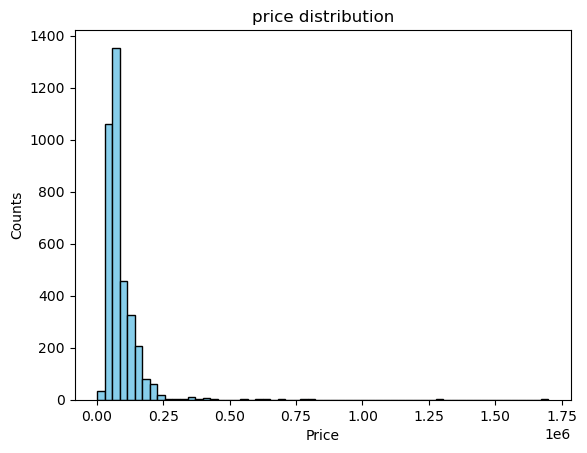

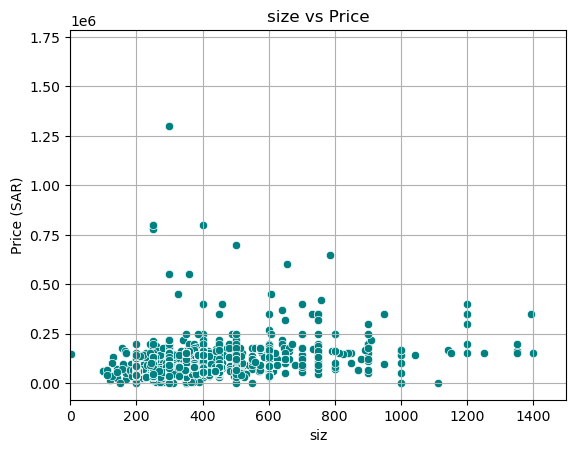

In [6]:

plt.hist(df['price'], bins=60, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Counts')
plt.title('price distribution')
plt.show()

sns.scatterplot(data= df, x= 'size' , y = 'price' , color='teal') 
plt.xlim(0, 1500)
plt.title('size vs Price')
plt.xlabel('siz')
plt.ylabel('Price (SAR)')
plt.grid(True)

plt.show()


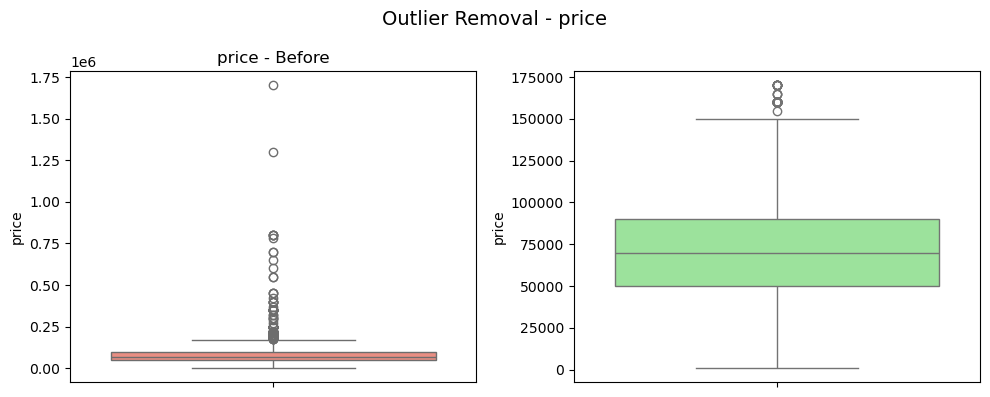

No of outliers detected for price is :200


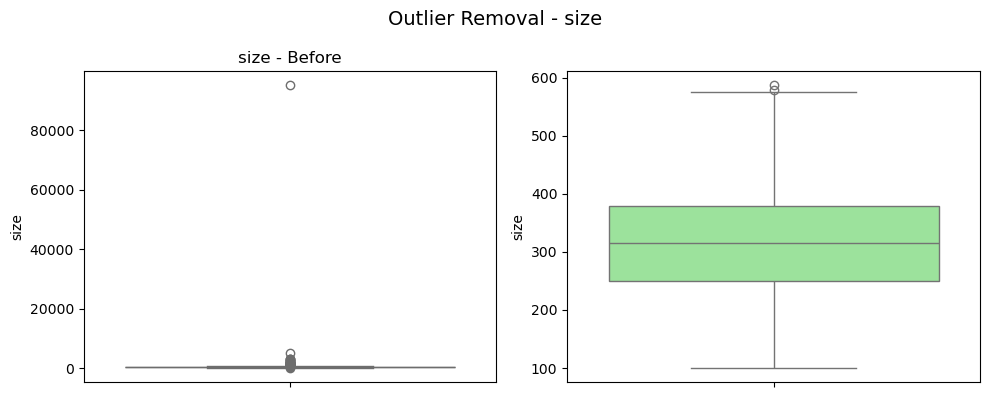

No of outliers detected for size is :320


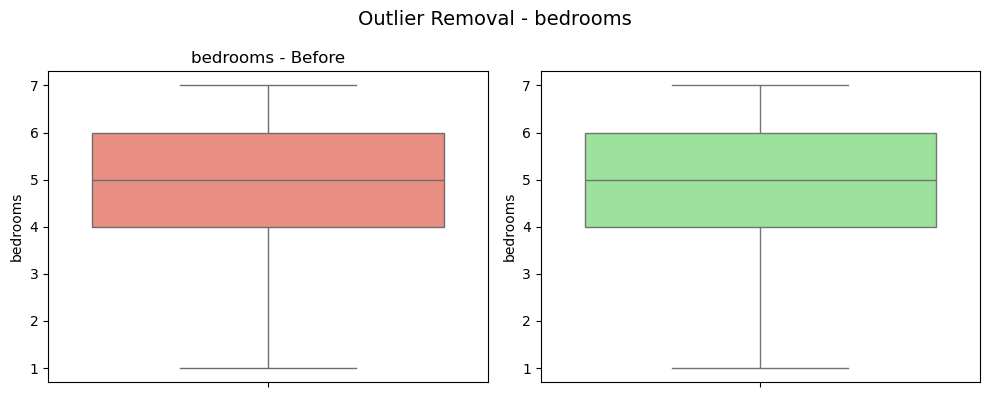

No of outliers detected for bedrooms is :0


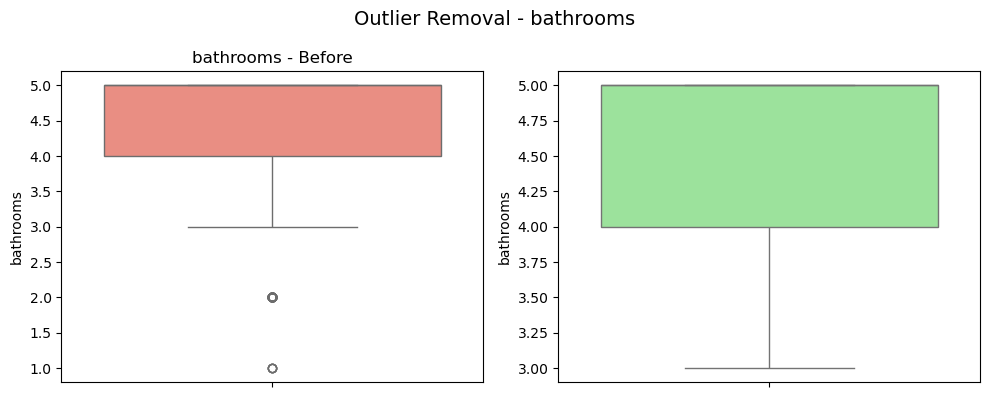

No of outliers detected for bathrooms is :71


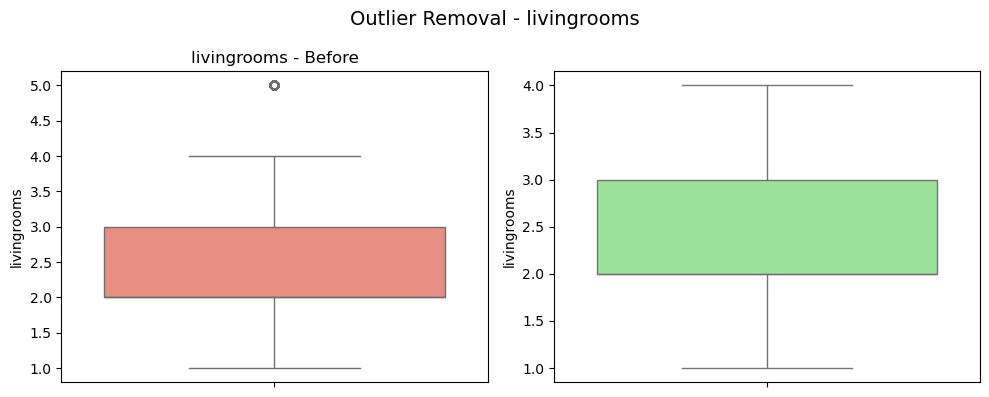

No of outliers detected for livingrooms is :117


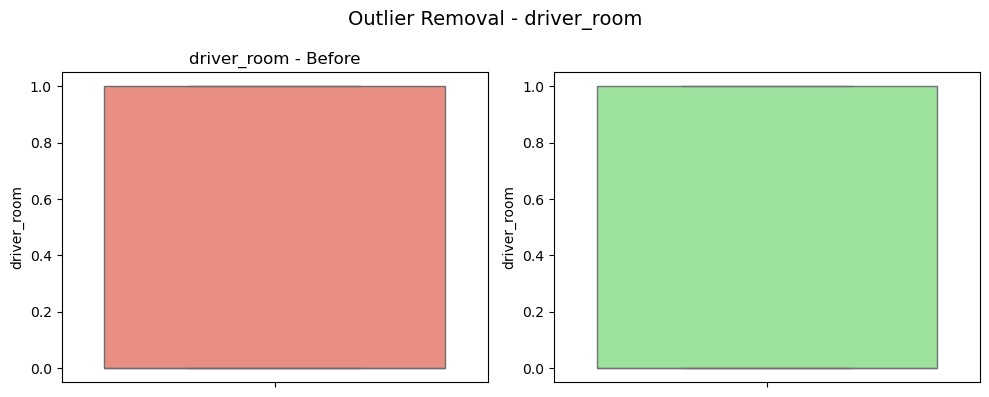

No of outliers detected for driver_room is :0
before cleaning : 3638
after cleaning : 3031


In [ ]:
df_original = df.copy()

numeric_cols =   [
        'price',      
        'size',      
        'bedrooms',   
        'bathrooms',  
        'livingrooms' ,
        'driver_room' 
        
    ]
mask = pd.Series(True, index=df.index)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    col_outliers = (df[col] < lower) | (df[col] > upper)
    outliers_count = col_outliers.sum()

    mask &= ~col_outliers  
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, y=col, color='salmon')
    plt.title(f'{col} - Before')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df[~col_outliers], y=col, color='lightgreen')

    plt.suptitle(f'Outlier Removal - {col}', fontsize=14)
    plt.tight_layout()
    plt.show()
    print(f'No of outliers detected for {col} is :{outliers_count}')


df_cleaned = df[mask].copy()

print(f"before cleaning : {df.shape[0]}")
print(f"after cleaning : {df_cleaned.shape[0]}")

In [8]:
#Based on annual rent, these values are mostly monthly rent.
df_cleaned.loc[df_cleaned['price'] < 15000, 'price'] = df_cleaned['price'] * 12


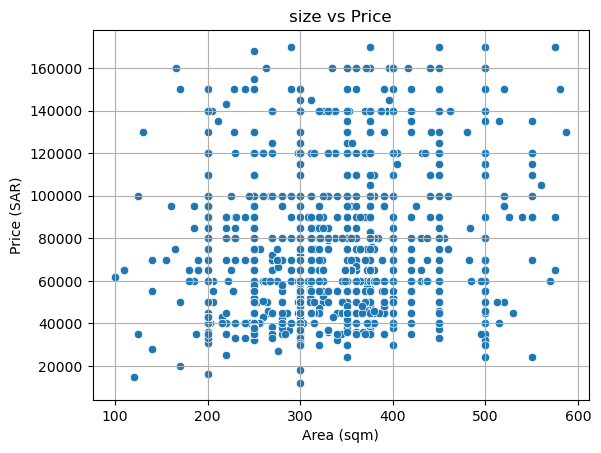

In [9]:
sns.scatterplot(data=df_cleaned, x='size', y='price')
plt.title('size vs Price')
plt.xlabel('Area (sqm)')
plt.ylabel('Price (SAR)')
plt.grid(True)
plt.show()

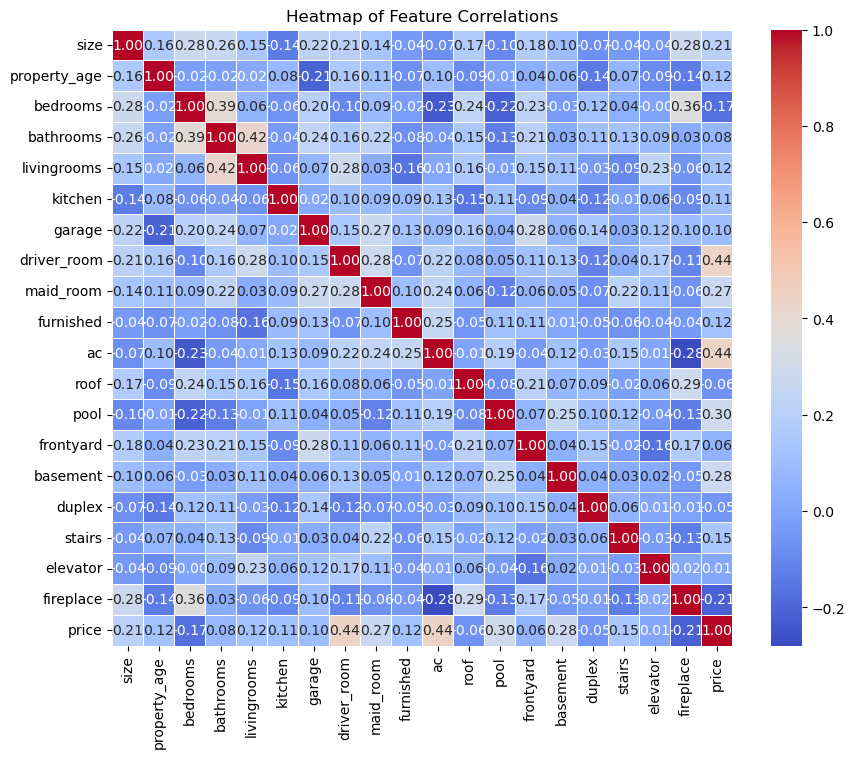

features correlations with price
driver_room    0.439320
ac             0.435816
pool           0.295199
basement       0.278345
maid_room      0.270246
Name: price, dtype: float64
___________________________
fireplace   -0.214503
bedrooms    -0.173968
roof        -0.064308
duplex      -0.053884
elevator     0.006147
Name: price, dtype: float64


In [10]:

correlation_matrix = df_cleaned.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Heatmap of Feature Correlations')
plt.show()

correlation_with_price = df_cleaned.corr(numeric_only=True)['price']

correlation_with_price = correlation_with_price.drop('price')

top_5 = correlation_with_price.sort_values(ascending=False).head(5)
top_5_dec = correlation_with_price.sort_values(ascending=True).head(5)

print('features correlations with price')
print(top_5)
print('___________________________')
print(top_5_dec)

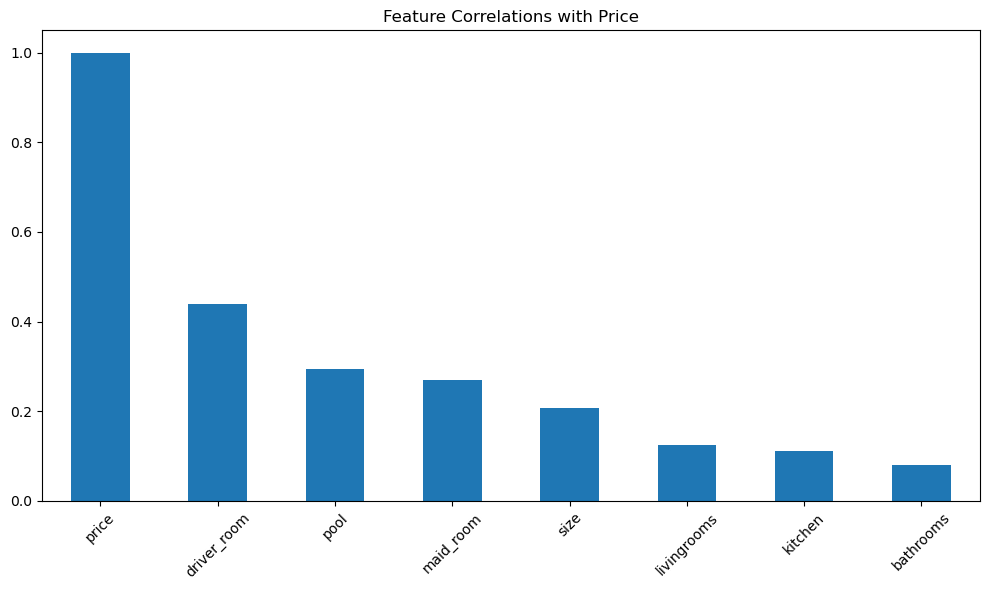

In [11]:
  # Plot correlations 
features = [
        'size',
        'bedrooms',
        'bathrooms',
        'livingrooms',
        'driver_room',
        'kitchen' ,
        'maid_room' ,
        'pool'
    ]
correlations = df_cleaned[features + ['price']].corr()['price'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
correlations[:-1].plot(kind='bar') 
plt.title('Feature Correlations with Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
#Feature Engineering

categorical_cols = ['district', 'city', 'front' , 'property_age']

df_encoded = df_cleaned.copy()

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])

df_encoded

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,duplex,stairs,elevator,fireplace,price,details,district_encoded,city_encoded,front_encoded,property_age_encoded
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...,71,2,6,0
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...,84,2,2,0
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...,84,2,2,0
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...,99,2,9,0
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...,78,2,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,الخبر,حي اللؤلؤ,غرب,437,0,7,5,2,1,1,...,1,1,0,1,60000,للإيجار فيلا دورين وملحق في حي الأصداف\n\nالمس...,89,0,9,0
3714,الخبر,حي الصواري,جنوب,400,0,5,5,3,0,1,...,1,1,0,0,55000,دبلكس للأيجار حي الصواري ج ٤٣\n\nمجلس خارجي (د...,70,0,2,0
3715,الخبر,حي اللؤلؤ,غرب,330,0,6,4,2,1,0,...,1,0,0,1,37000,حوش مجلس خارجي مجلس رجال دورة مياة مجلط صاله ...,89,0,9,0
3716,الخبر,حي الكورنيش,جنوب,300,13,6,5,2,1,1,...,1,1,0,0,90000,فيلا فاخرة في حي كورنيش الخبر. أفضل حي بالخبر....,88,0,2,12


In [13]:

feature = [ 
        'size',
        'bedrooms',
        'bathrooms',
        'livingrooms',
        'driver_room',
        'kitchen' ,
        'maid_room' ,
        'district_encoded' ,
        'city_encoded' ,
        'front_encoded' ,
        'property_age_encoded'
    ]

X = df_encoded[feature]
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)



In [17]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²: {r2:.4f}")

comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(comparison.head(10))

MAE: 7,232.58
RMSE: 16,043.97
R²: 0.7602
   Actual     Predicted
0   70000  70248.078125
1   72000  71800.132812
2   90000  89426.109375
3   95000  97802.695312
4   56000  53724.609375
5   80000  80621.078125
6   80000  74673.671875
7   90000  99194.718750
8   40000  40407.972656
9   45000  45286.804688


In [ ]:
def predict_price_xgb(model, input_data, feature_columns):
    input_df = pd.DataFrame(input_data, index=[0])
    
    for col in feature_columns:
        if col not in input_df.columns:
            input_df[col] = 0  
    
    input_df = input_df[feature_columns]
    
    predicted_price = model.predict(input_df)[0]
    
    return predicted_price

In [ ]:
example_input = {
    'size': 250,
    'bedrooms': 5,
    'bathrooms': 5,
    'livingrooms': 1,
    'driver_room': 0,
    'kitchen': 1,
    'maid_room': 1,
    'district_encoded': 71,
    'city_encoded': 2,
    'front_encoded': 6,
    'property_age_encoded': 0
}

predicted = predict_price_xgb(xgb, example_input, feature)
print(f"Predicted Price: {predicted:,.2f} SAR")

Predicted Price: 80,621.08 SAR
